***
# <span style="color:red">_Global Terrorism_</span>
## <span style="color:red">Group 7: Yaron Richter, Tal Davidi, Adi Cohen, Lior Ben-Ishai</span>
<img src="https://user-images.githubusercontent.com/103241195/169303775-edbe5792-f63f-4613-ae89-273c9a12d6b7.jpg" height="300px" width="300px">

### <span style="color:red">The source of the data frame: https://www.start.umd.edu/</span>
***

# <span style="color:red">The project reserach question: What is the cause of injures from terror occations in the world? Does it relevant also to Israel or is there another cause?</span>
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
url1 = 'https://raw.githubusercontent.com/YaronRic/Project-DS-2022/main/global_terrorism_csv1.csv'
url2 = 'https://raw.githubusercontent.com/YaronRic/Project-DS-2022/main/global_terrorism_csv2.csv'

In [3]:
df = pd.read_csv(url1)
csv2 = pd.read_csv(url2)

***
# <span style="color:green">_Order The Data Frame_</span>
<img src="https://user-images.githubusercontent.com/103241195/169314786-e9295d95-72e2-4f7f-a666-ac5f03f29d3b.jpg" height="100px" width="100px">

***

#### <span style="color:purple">At first, we needed to order the data frame to be more convinient and clear.</span>

> ##### We have **renamed the titles** of selected columns in the data:

In [4]:
df.rename(columns={'index':'index', 'country_txt':'country','region_txt':'region','suicide':'is_suicide',
                     'attacktype1_txt':'attack_type','targtype1_txt':'target_type','targsubtype1_txt':'target_subtype'}, inplace = True)

> ##### We have added some **more relevant columns** to our data from another data:

In [5]:
df['weapon_type'] = csv2['weaptype1_txt']
df['wounded'] = csv2['nwound']
df['killed'] = csv2['nkill']

> ##### We have extract the **years** of every occation to a new column:

In [6]:
df['date'] = pd.to_datetime(df.date)              # convert to datetime
df['year'] = pd.DatetimeIndex(df.date).year       # extract year

> ##### We needed to deal with the occations in the data which don't contain a precise date **(NaN)**. For the year of each of those occations we have set the year of the **following occation**:

In [7]:
df['year'].fillna(method='bfill', inplace = True) # change NaNs in 'year' to the following values
df['year'] = df['year'].astype({'year': 'int'})   # convert the column to int

> ##### We wanted the **'year'** column to be the 1st column in the data:

In [8]:
column_to_move = df.pop("year")       # pop 'year' col
df.insert(1, "year", column_to_move)  # insert 'year' col in col 0

***
# <span style="color:green">_Operation of Global Terror Occations VS Israel_ Occations</span>
<img src="https://user-images.githubusercontent.com/103241195/169316191-9c27c2ea-b0ed-4da5-8935-289836521887.jpg" height="100px" width="100px">

***

#### <span style="color:purple">We wanted to see the scope of the worldwide terror occations and the magnitude of Israel terror occation compared with worldwide numbers.</span>

> ##### Before we started the operation we wanted to get a big picture of the data.
> ##### We have created two graphs that display the <span style="color:red">trend</span> of occations **by years** for both <span style="color:red">worldwide</span> and  <span style="color:red">Israel</span>:

### <span style="color:blue">_Worldwide_</span>: 

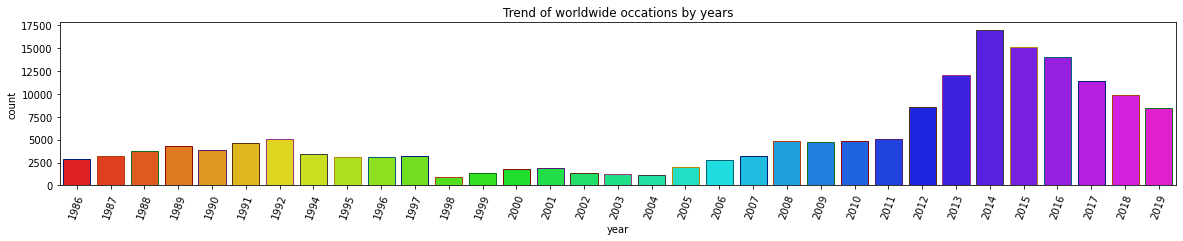

In [9]:
plt.subplots(figsize=(20,3))
ax = sns.countplot(x = 'year', data = df, palette = 'gist_rainbow', edgecolor = sns.color_palette('dark'))
plt.xticks(rotation = 70)
plt.title('Trend of worldwide occations by years')
plt.show()

### <span style="color:blue">_Israel_</span>: 

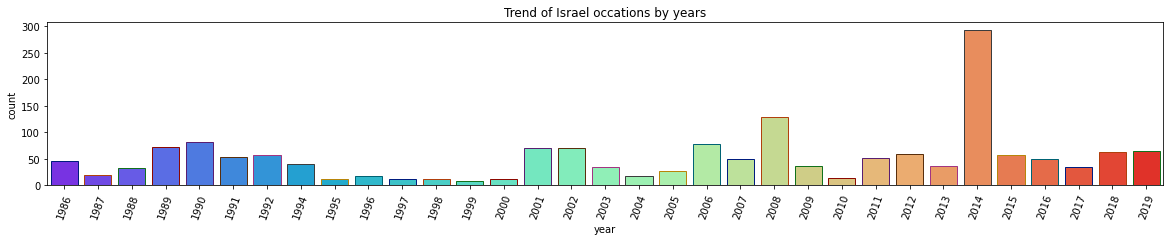

In [10]:
df_israel = df.loc[df.country == 'Israel']
plt.subplots(figsize=(20,3))
ax = sns.countplot(x = 'year', data = df_israel, palette = 'rainbow', edgecolor = sns.color_palette('dark'))
plt.xticks(rotation = 70)
plt.title('Trend of Israel occations by years')
plt.show()

#### <span style="color:purple">We can see from those graphs that the trends are different, especially in the last years.</span>
#### <span style="color:purple">Hence, let's check the weight of Israel terror occations of those of worldwide.</span>

> ##### We have found the <span style="color:red">numbers</span> of both **worldwide** and  **Israel** <span style="color:red">terror occations</span>:

In [11]:
num_terr = df['year'].count()                                      # num of worldwide terror occations
num_terr_israel = df['year'].loc[df.country == 'Israel'].count()   # num of Israel terror occations
print(f'The numbers of terrorism occations in the world: {num_terr}')
print(f'The numbers of terrorism occations in Israel: {num_terr_israel}')

The numbers of terrorism occations in the world: 174199
The numbers of terrorism occations in Israel: 1718


> ##### Then, we have found the <span style="color:red">percents</span> of terror occations in **Israel** of the **global occations**:

In [12]:
percent_terr_israel_vs_world = num_terr_israel / num_terr          # The percent of terror occations in Israel of the global occations

In [13]:
print(f'The percent of terrorism occations in Israel of the world: {((percent_terr_israel_vs_world)*100).round(2)}%')

The percent of terrorism occations in Israel of the world: 0.99%


##### <span style="color:purple">* A mark which may be worrisome...</span>.
### <span style="color:purple">We can see that the numbers of **Israel terror occations** are tending to **one percent** of all the worldwide terror occations!</span>

##### We have found the number of both **worldwide** and  **Israel** <span style="color:red">suicide</span> terror occations:

In [14]:
num_suicide = df['is_suicide'].sum()                                     # num of global suicide terror
num_suicide_israel = df['is_suicide'].loc[df.country == 'Israel'].sum()  # num of suicide terror in Israel
print(f'The numbers of suicide terror occations in the world: {num_suicide}')
print(f'The numbers of suicide terror occations in Israel: {num_suicide_israel}')

The numbers of suicide terror occations in the world: 7244
The numbers of suicide terror occations in Israel: 123


##### We have found the <span style="color:red">percent</span> of <span style="color:red">suicide</span> terror occations in **Israel** of the **global occations**:

In [15]:
percent_suicide_israel_vs_world = num_suicide_israel / num_suicide       # percent of suicide terror in Israel from the global suicide terror

In [16]:
print(f'The percent of suicide terror occations in Israel of the world: {((percent_suicide_israel_vs_world)*100).round(2)}%')

The percent of suicide terror occations in Israel of the world: 1.7%


##### <span style="color:purple">* An another mark which may be worrisome...</span>.
### <span style="color:purple">We can see that the numbers of **Israel terror occations** are tending to **two percents** of all the worldwide terror occations!</span>

<img src="https://user-images.githubusercontent.com/103241195/169381919-1e94288e-90ce-4d4b-b0af-d746100aa61d.png" height="100px" width="300px" align="right">

***
# <span style="color:green">_Correllations_</span>
<img src="https://user-images.githubusercontent.com/103241195/169318405-4e3b45f9-3d34-42d1-98d6-a089c2dcae14.png" height="100px" width="100px">

***

#### <span style="color:purple">In this chapter we wanted to search for the reason of the numbers of people that have been injured from the terror occations.</span>
###### <span style="color:purple">* injured = wounded + killed</span>

> ##### First, we have searched the **correlations** between <span style="color:red">'occations'</span>, <span style="color:red">'wounded'</span> and <span style="color:red">'killed'</span> for both worldwide and Israel:

### <span style="color:blue">_Worldwide_</span>: 
<img src="https://user-images.githubusercontent.com/103241195/169509214-25fae14e-4877-49e8-a128-b9d95160a3a9.png" height="50px" width="50px">


> ##### We have created a data frame of <span style="color:blue">**worldwide**</span> which contains the <span style="color:red">numbers of occations, wounded and killed</span> **by years**:

In [17]:
df_years = df.groupby('year').agg({'index':'count', 'wounded':'sum', 'killed':'sum'}).reset_index()
df_years.rename(columns = {'index':'occations'}, inplace = True)

> ##### In addition, we have checked the correlations while delving into <span style="color:red">**occations-wounded**</span> and <span style="color:red">**occations-killed**</span>:

In [18]:
features = ['occations', 'wounded', 'killed']
corr_matrix = df_years[features].corr(method = 'spearman')
corr_matrix

,occations,wounded,killed
occations,1.000000,0.632019,0.882353
wounded,0.632019,1.000000,0.778409
killed,0.882353,0.778409,1.000000


> ##### Let's see those <span style="color:blue">worldwide</span> findings by a <span style="color:red">plot</span>:

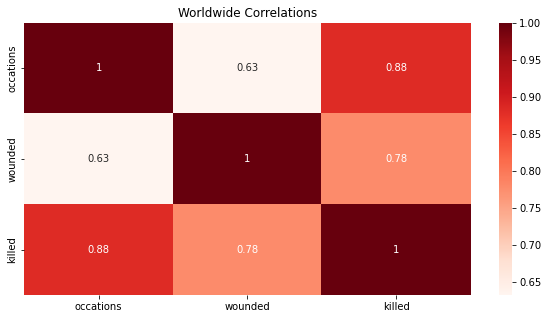

In [19]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(data = corr_matrix, cmap = 'Reds', annot = True)
ax.set_title("Worldwide Correlations")
plt.show()

### <span style="color:purple">Those percents point on a correlation...</span>
### <span style="color:purple">So: less occations = less injures ?</span>
#### <span style="color:purple">Let's see the possibility of this idea in Israel...</span>

***

### <span style="color:blue">_Israel_</span>: 
<img src="https://user-images.githubusercontent.com/103241195/169508890-c97c6d08-f647-412b-89b7-a3a0de0ee991.png" height="50px" width="50px">

> ##### To check the possibility of correlation beteween number of occation to number of injures, We have created a data frame of <span style="color:blue">**Israel**</span> which contains the <span style="color:red">numbers of occations, wounded and killed</span> **by years**:

In [20]:
df_israel = df.loc[df.country == 'Israel']

In [21]:
df_years_israel = df_israel.groupby('year').agg({'index':'count', 'wounded':'sum', 'killed':'sum'}).reset_index()
df_years_israel.rename(columns = {'index':'occations'}, inplace = True)

> ##### Then, we have checked the correlations while delving into <span style="color:red">**occations-wounded**</span> and <span style="color:red">**occations-killed**</span>:

In [22]:
features = ['occations', 'wounded', 'killed']
corr_matrix = df_years_israel[features].corr(method = 'spearman')
corr_matrix

,occations,wounded,killed
occations,1.000000,0.113462,0.312061
wounded,0.113462,1.000000,0.815834
killed,0.312061,0.815834,1.000000


> ##### Let's see those <span style="color:blue">Israel</span> findings by a <span style="color:red">plot</span>:

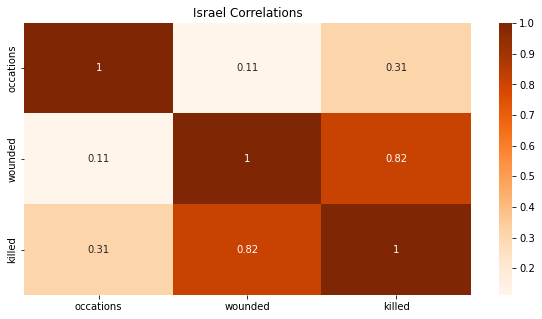

In [23]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(data = corr_matrix, cmap = 'Oranges', annot = True)
ax.set_title("Israel Correlations")
plt.show()

##### <span style="color:purple">* Those percents are high for a cheese, not for correlation...</span><img src="https://user-images.githubusercontent.com/103241195/169521906-4ce545a1-2020-4f0e-82eb-12419d986fd6.png" height="50px" width="50px">
### <span style="color:purple">According to those results we have **rejected** the possibility that the number of the injures (wounded and killed) depends on the number of occations in **Israel**.</span>

#### <span style="color:purple">Why there are differences between the correlations data of worldwide and Israel?</span>
#### <span style="color:purple">After we have sat and blessed on this complex that we have eaten, we have decided to check the features of Israel occations.</span>

***
# <span style="color:green">_Type attack_</span>
<img src="https://user-images.githubusercontent.com/103241195/169322499-404f4106-0572-470b-888a-81781bc3ee5c.png" height="100px" width="100px">

***

#### <span style="color:purple">In the search of the cause of the injures number in Israel, we decided to exam the types of the terror attacks in **Israel**.</span>

> ##### We have found the <span style="color:red">most common attack type</span> in every **year** in <span style="color:blue">Israel</span>:

In [24]:
israel_attack_type_pivot = df_israel.pivot_table(values = 'index', index = 'attack_type', columns = 'year', aggfunc = np.size)
israel_attack_type_pivot = israel_attack_type_pivot.fillna(0).astype('int')# we have no 0 in the original so there is no problem to change nan to 0
israel_attack_type_styler = israel_attack_type_pivot.style.highlight_max(color = 'pink', axis = 0)
israel_attack_type_styler

year,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
attack_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Armed Assault,3,2,7,9,13,10,6,7,2,5,4,2,1,0,15,11,4,0,6,3,1,5,0,0,3,3,5,16,35,24,16,11,7
Assassination,6,4,2,24,32,23,28,17,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
Bombing/Explosion,35,12,15,28,26,12,11,11,6,10,6,10,7,9,53,58,30,18,22,74,47,123,35,14,47,55,26,270,14,16,17,40,53
Facility/Infrastructure Attack,1,2,7,8,6,5,4,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,1,5,4,2,9,1,8,5
Hijacking,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hostage Taking (Kidnapping),0,0,0,2,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,1,0,0,0
Unarmed Assault,0,0,0,2,2,1,6,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,2,4,0,0,4,0


#### <span style="color:purple">We can see clearly that the most common attack type is <span style="color:red">'Bombing/Explosion'</span> in almost every year in **Israel**.</span>

> ##### To see the total significant of the attack types we needed to find the total number of every <span style="color:red">attack type</span> in <span style="color:blue">Israel</span>:

In [25]:
df_israel_attack_type = df_israel.pivot_table(values = 'index', index = 'attack_type', aggfunc = np.size)
df_israel_attack_type = df_israel_attack_type.fillna(0).astype('int')
df_israel_attack_type = df_israel_attack_type.reset_index().sort_values(by = ['index'], ascending = False)
df_israel_attack_type.rename(columns = {'index':'occations'}, inplace = True)
df_israel_attack_type

,attack_type,occations
2,Bombing/Explosion,1210
0,Armed Assault,236
1,Assassination,143
3,Facility/Infrastructure Attack,74
6,Unarmed Assault,27
5,Hostage Taking (Kidnapping),12
4,Hijacking,3


> ##### Let's see those result by a <span style="color:red">graph</span>:

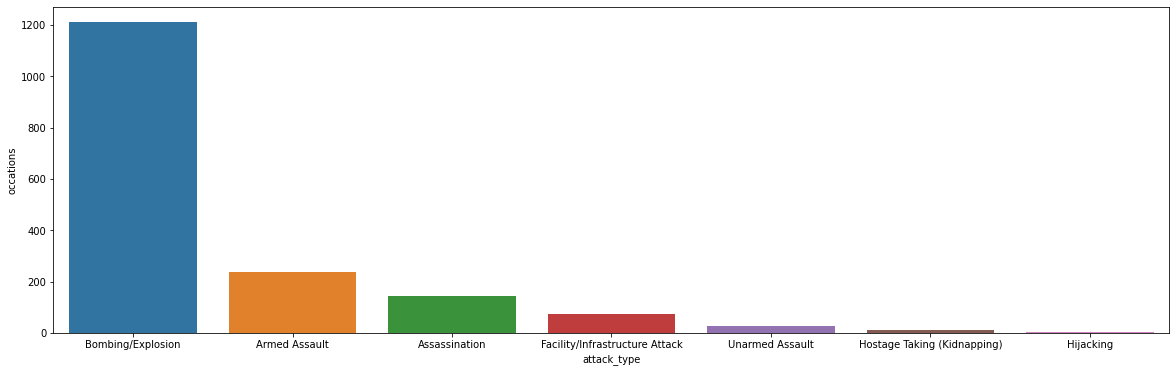

In [26]:
plt.subplots(figsize=(20,6))
ax = sns.barplot(data = df_israel_attack_type, x = 'attack_type', y = 'occations')

#### <span style="color:purple">Well then, those results are breathtaking. 'Bombing/Explosion' is the favorite attack type on the terrorists in Israel without a doubt. But, is it the cause of the number of injured?</span>
#### <span style="color:purple">Keep holding your breath, we are almost there...</span>

***
# <span style="color:green">_lethality_</span>
<img src="https://user-images.githubusercontent.com/103241195/169337108-b2e85bd0-e566-499d-9e06-deffd841a51d.png" height="100px" width="100px">

***

### <span style="color:purple">Hang tight, this chapter is going to **stunning** you, but not from the good and kind meaning of this word.</span>

> ##### We have sorted the **regions** by the <span style="color:red">most lethal</span> region to the <span style="color:red">least lethal</span>:
> ###### * Lethal region is a region with the highest <span style="color:red">terror occations</span>.

In [27]:
df_region = df.groupby('region')['index'].count().sort_values('index', ascending = False).reset_index()
df_region.rename(columns = {'index':'occations'}, inplace = True)
df_region

,region,occations
0,Middle East & North Africa,53550
1,South Asia,50727
2,Sub-Saharan Africa,20911
3,South America,13740
4,Southeast Asia,13509
5,Western Europe,9377
6,Eastern Europe,5221
7,Central America & Caribbean,3923
8,North America,1707
9,East Asia,701


> ##### We have found that the most lethal region is the **Israel's** region- <span style="color:red">'Middle East & North Africa'</span>.
> ##### Intresting... let's see the <span style="color:red">weight of Israel</span> on this region:

In [28]:
num_region = df_region.iloc[0,1]
percent_terr_israel_vs_region = num_terr_israel / num_region          # The percent of terror occations in Israel of the global occations
print(f'The percent of terrorism occations in Israel of "Middle East & North Africa" region : {((percent_terr_israel_vs_region)*100).round(2)}%')

The percent of terrorism occations in Israel of "Middle East & North Africa" region : 3.21%


##### <span style="color:purple">* An another mark which may be worrisome...</span>.
### <span style="color:purple">We can see that the numbers of **Israel terror occations** are having over **three percents** of all the region terror occations!</span>

<img src="https://user-images.githubusercontent.com/103241195/169562750-175c757b-d4d3-4f31-a540-cd75956b0445.png" height="200px" width="200px">

#### <span style="color:purple">We have found that **Israel** is a **lethal** country. By that, we wanted to research the situation better, so we digged in.</span>

> ##### We have found the most <span style="color:red">lethal years</span> in **israel**:
> ###### * Lethal year is a year with high rates of one of the following: <span style="color:red">occations\wounded\killed</span>.

In [29]:
df_years_israel = df_israel.groupby('year').agg({'index':'count', 'wounded':'sum', 'killed':'sum'}).reset_index().astype(int)
df_years_israel.rename(columns = {'index':'occations'}, inplace = True)
df_israel_style = df_years_israel.style.highlight_max(subset = df_years_israel.columns[1:], color = 'pink', axis = 0)
df_israel_style

,year,occations,wounded,killed
0,1986,47,144,8
1,1987,20,45,11
2,1988,32,43,12
3,1989,73,71,35
4,1990,81,184,45
5,1991,53,34,24
6,1992,58,80,28
7,1994,41,169,54
8,1995,12,147,17
9,1996,18,224,70


> ##### We can see that the **most lethal years** are <span style="color:red">2002</span> (highest wounded and killed) and <span style="color:red">2014</span> (highest occations number).
> ##### Let's see those result by a <span style="color:red">graph</span>:

In [30]:
lethal_israel = df_years_israel.loc[(df_years_israel.year == 2002) | (df_years_israel.year == 2014)]
m_df = pd.melt(lethal_israel, id_vars = 'year', value_vars = ['occations', 'wounded', 'killed'])

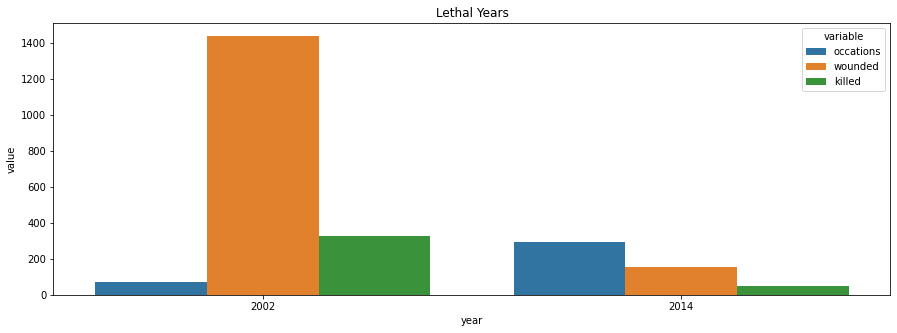

In [31]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x='year', y='value', hue='variable', data = m_df)
ax.set_title("Lethal Years")
plt.show()

> ###### * From this graph we can see better the <span style="color:red">non-correlation</span> that we have searched before.

> ##### We wanted to see the weight of those lethal years on the total numbers in Israel.

> ##### First, we have found the number of <span style="color:red">injured</span> of <span style="color:red">2002</span>- the most lethal year of injured in Israel:

In [32]:
df_years_israel['total wounded & killed'] = df_years_israel['wounded'] + df_years_israel['killed']
total_occ_2002 = df_years_israel.loc[(df_years_israel.year == 2002)]['total wounded & killed'].sum()
total_occ_2002

1764

> ##### Second, we have found the <span style="color:red">total injured</span> numbers in Israel:

In [33]:
total_occ_israel = df_years_israel['total wounded & killed'].sum()
total_occ_israel

7726

> ##### Then, we have found the <span style="color:red">weight</span> of <span style="color:red">2002</span>:

In [34]:
total_occ_2002 / total_occ_israel

0.2283199585814134

### <span style="color:purple">That is shocking! Over **fifth** of all injured in Israel were in year **2002**- the year of the second Intifada!</span>

> ##### Now, let's focus on year <span style="color:red">2014</span>- the most lethal year of number of occations in Israel.
> ##### We have found the number of occations in 2014:

In [35]:
total_occ_2014 = df_years_israel.loc[(df_years_israel.year == 2014)]['occations'].sum()
total_occ_2014

293

> ##### Let's see the <span style="color:red">weight</span> of <span style="color:red">2014</span> of the number of occations that we have found earlier in this project:

In [36]:
total_occ_2014 / num_terr_israel

0.17054714784633296

### <span style="color:purple">Unbelievable! Almost **fifth** of all occations in Israel were in year **2014**- the year of "Zok-Eitan" opperation!</span>

***
# <span style="color:green">_Causes to Death and Wound Numbers_</span>
<img src="https://user-images.githubusercontent.com/103241195/169339539-2d031f4d-405d-4b55-b937-b53e13d2e84a.png" height="100px" width="100px">

***

### <span style="color:purple">We have not got yet the answer to our second part of our research question.</span>
### <span style="color:purple">So: What is the cause of the number of injured from terror occations in Israel?</span>
### <span style="color:purple">In this part of the project we have focused on the cause.</span>

> ##### We have started with finding the <span style="color:red">number of injures</span> in Israel (wounded and killed) for **each year**:

In [37]:
df_years_israel['total wounded & killed'] = df_years_israel['wounded'] + df_years_israel['killed']

> ##### Afterwords, we have found the <span style="color:red">number of suicide occations</span> in Israel for **each year**:

In [38]:
df_israel_suicide = df_israel.groupby('year')['is_suicide'].sum().reset_index()
df_years_israel['num of suicides'] = df_israel_suicide['is_suicide']

In [39]:
df_israel_attack_type = israel_attack_type_pivot.reset_index()
years_values = df_israel_attack_type.iloc[:,1:].astype(float)

> ##### Then, we have found the <span style="color:red">most common attack type</span> in Israel for **each year**:

In [40]:
israel_attack_type_pivot = df_israel.pivot_table( values ='index', index = 'attack_type', columns = 'year', aggfunc = np.size)
israel_max_attack = israel_attack_type_pivot.idxmax().reset_index()

> ##### We have found also the <span style="color:red">number of every most common attack type</span> in Israel for **each year**:

In [41]:
df_israel_max = df_israel_attack_type.max().reset_index()
df_israel_max.rename(columns={0:'max_value'}, inplace = True)
df_israel_max = df_israel_max.drop(labels=0, axis=0).reset_index()

In [42]:
df_years_israel['max_value'] = df_israel_max['max_value']
df_years_israel['max_attack'] = israel_max_attack[0]

> ##### Let's see those outcomes that we have found in this chapter yet in an <span style="color:red">assembled table</span>:

In [43]:
df_years_israel_styler = df_years_israel.style.highlight_max(subset = df_years_israel.columns[1:-1], color = 'pink', axis = 0)
df_years_israel_styler

,year,occations,wounded,killed,total wounded & killed,num of suicides,max_value,max_attack
0,1986,47,144,8,152,0,35,Bombing/Explosion
1,1987,20,45,11,56,0,12,Bombing/Explosion
2,1988,32,43,12,55,0,15,Bombing/Explosion
3,1989,73,71,35,106,0,28,Bombing/Explosion
4,1990,81,184,45,229,0,32,Assassination
5,1991,53,34,24,58,0,23,Assassination
6,1992,58,80,28,108,0,28,Assassination
7,1994,41,169,54,223,4,17,Assassination
8,1995,12,147,17,164,2,6,Bombing/Explosion
9,1996,18,224,70,294,5,10,Bombing/Explosion


### <span style="color:purple">From this table we can see clearly that the lethal years that we saw before are still "performing" a leading role.</span>
##### <span style="color:purple">* The outcomes of total injured, number of suicide and most common attack type.</span>

> ##### We have created a data frame of the **most common attack type** in Israel- <span style="color:red">'Bombing/Explosion'</span> for **each year**.
> ##### In this data frame we have found the <span style="color:red">weight</span> of the **'Bombing/Explosion'** attack.
> ###### * The weight assembled from **Bombing/Explosion injured** _devided by_ **total injured**.

In [44]:
df_bombing_explosion = df_israel.loc[df_israel["attack_type"] == 'Bombing/Explosion']
df_years_bombing_explosion = df_bombing_explosion.groupby('year').agg({'index':'count', 'wounded':'sum', 'killed':'sum', 'is_suicide':'sum'}).reset_index().astype(int)
df_years_bombing_explosion.rename(columns = {'index':'Bombing/Explosion occations'}, inplace = True)
df_years_bombing_explosion['occation\'s injured'] = df_years_bombing_explosion['wounded'] + df_years_bombing_explosion['killed']
df_years_bombing_explosion.drop(['wounded', 'killed'], inplace = True, axis = 1)
df_years_bombing_explosion['total injured'] = df_years_israel['total wounded & killed']
df_years_bombing_explosion['weight Bombing/Explosion'] = df_years_bombing_explosion['occation\'s injured'] / df_years_bombing_explosion['total injured']
df_years_bombing_explosion_styler = df_years_bombing_explosion.style.highlight_max(subset = df_years_bombing_explosion.columns[1:], color = 'pink', axis = 0)
df_years_bombing_explosion_styler

,year,Bombing/Explosion occations,is_suicide,occation's injured,total injured,weight Bombing/Explosion
0,1986,35,0,129,152,0.848684
1,1987,12,0,39,56,0.696429
2,1988,15,0,34,55,0.618182
3,1989,28,0,10,106,0.094340
4,1990,26,0,42,229,0.183406
5,1991,12,0,7,58,0.120690
6,1992,11,0,25,108,0.231481
7,1994,11,4,164,223,0.735426
8,1995,6,2,159,164,0.969512
9,1996,10,5,275,294,0.935374


### <span style="color:purple">From this table we can see clearly that the weight of the **Bombing/Explosion** in Israel is **enormous**.</span>

> ##### Let's see those finding visualicly by a <span style="color:red">graph</span>:

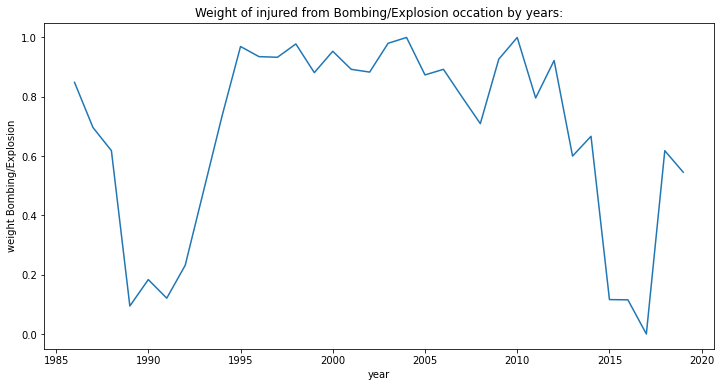

In [45]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data = df_years_bombing_explosion, x = 'year', y = 'weight Bombing/Explosion')
plt.title('Weight of injured from Bombing/Explosion occation by years:')
plt.show()

***
# <span style="color:green">_Lethal Occations_</span>
<img src="https://user-images.githubusercontent.com/103241195/169382338-4a6a27c1-19cd-4f3e-93a7-de66c011c8c1.png" height="100px" width="300px">

***

###### <span style="color:purple">* All of those lethality finding made us very intrested...</span>
### <span style="color:purple">At last, we were intrested of the most lethal terror occations.</span>

### <span style="color:blue">_Worldwide_</span>: 
<img src="https://user-images.githubusercontent.com/103241195/169509214-25fae14e-4877-49e8-a128-b9d95160a3a9.png" height="50px" width="50px">

##### <span style="color:dark">**_Wounded_**</span>: 

> ##### We have found the biggest numbers of **worldwide** <span style="color:red">wounded</span>:

In [46]:
df['wounded'].max()

10878.0

> ##### Then, we have found the <span style="color:red">matched</span> **worldwide** terror occation:

In [47]:
max_wounded = df['wounded'].idxmax()
df.iloc[max_wounded].reset_index()

,index,46149
0,index,46150
1,year,2001
2,date,2001-11-09 00:00:00
3,country,United States
4,city,New York City
5,region,North America
6,is_suicide,1
7,attack_type,Hijacking
8,target_type,Private Citizens & Property
9,target_subtype,Unnamed Civilian/Unspecified


<img src="https://user-images.githubusercontent.com/103241195/169687608-12b2d04a-9c32-422f-bcc9-53a918cf1914.png" height="100px" width="300px">

##### The occation description:
##### Nineteen terrorists hijacked four commercial airliners mid-flight. The hijackers successfully crashed the first two planes into the North and South Towers of the World Trade Center in New York City, and the third plane into the Pentagon in Arlington, Virginia. The fourth plane was intended to hit a federal government building[d] in Washington, D.C., but instead crashed down in a field.
***

##### <span style="color:dark">**_Killed_**</span>: 

> ##### We have found the biggest numbers of **worldwide** <span style="color:red">killed</span>:

In [48]:
df['killed'].max()

1570.0

> ##### Then, we have found the <span style="color:red">matched</span> **worldwide** terror occation:

In [49]:
max_killed = df['killed'].idxmax()
df.iloc[max_killed].reset_index()

,index,106559
0,index,106560
1,year,2014
2,date,2014-12-06 00:00:00
3,country,Iraq
4,city,Tikrit
5,region,Middle East & North Africa
6,is_suicide,0
7,attack_type,Hostage Taking (Kidnapping)
8,target_type,Military
9,target_subtype,"Military Personnel (soldiers, troops, officers..."


<img src="https://user-images.githubusercontent.com/103241195/169687750-69b5ce9d-4471-407e-8fcf-719e7f84dd4f.png" height="100px" width="300px">

##### The occation description:
##### The Camp Speicher massacre occurred when the Islamic State of Iraq and the Levant (ISIL) killed Iraqi people in an attack on Camp Speicher in Tikrit, Iraq. At the time of the massacre, there were between 5,000 and 10,000 unarmed cadets in the camp, and ISIL fighters selected the Shias and non-Muslims for execution. It is the second deadliest act of terrorism in history, only surpassed by the September 11 attacks.
***

> ##### The occation's motive:

In [50]:
print(df.loc[max_killed, 'motive'])

The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.


#####
***

### <span style="color:blue">_Israel_</span>:
<img src="https://user-images.githubusercontent.com/103241195/169508890-c97c6d08-f647-412b-89b7-a3a0de0ee991.png" height="50px" width="50px">

##### <span style="color:dark">**_Wounded_**</span>: 

> ##### We have found the biggest numbers of **Israel** <span style="color:red">wounded</span>:

In [51]:
df_israel['wounded'].max()

192.0

> ##### Then, we have found the <span style="color:red">matched</span> **Israel** terror occation:

In [52]:
max_wounded_israel = df_israel['wounded'].idxmax()
df.iloc[max_wounded_israel].reset_index()

,index,39521
0,index,39522
1,year,1997
2,date,1997-04-09 00:00:00
3,country,Israel
4,city,Jerusalem
5,region,Middle East & North Africa
6,is_suicide,1
7,attack_type,Bombing/Explosion
8,target_type,Private Citizens & Property
9,target_subtype,Marketplace/Plaza/Square


<img src="https://user-images.githubusercontent.com/103241195/169687846-be42c0d0-f4e9-4121-b76a-49bba560dbcd.png" height="100px" width="300px">

##### The occation description:
##### Two palestinian terrorists entered to 'Machne Yehuda' market dressed-up as ultra-orthodox Jews. by a distance of 45 meters from each other they have bombed themselves with nail-laden bombs.
***

##### <span style="color:dark">**_Killed_**</span>: 

> ##### We have found the biggest numbers of **worldwide** <span style="color:red">killed</span>:

In [53]:
df_israel['killed'].max()

31.0

> ##### Then, we have found the <span style="color:red">matched</span> **Israel** terror occation:

In [54]:
max_killed_israel = df_israel['killed'].idxmax()
df.iloc[max_killed_israel].reset_index()

,index,46933
0,index,46934
1,year,2002
2,date,2002-03-27 00:00:00
3,country,Israel
4,city,Netanya
5,region,Middle East & North Africa
6,is_suicide,1
7,attack_type,Bombing/Explosion
8,target_type,Business
9,target_subtype,NaN


<img src="https://user-images.githubusercontent.com/103241195/169687868-c0595697-4a1a-47d7-a04d-b6c8960aaa9b.png" height="80px" width="200px">

##### The occation description:
##### The Passover massacre was a suicide bombing carried out by Hamas at the Park Hotel in Netanya, during a Passover seder. It was the deadliest attack against Israelis during the Second Intifada.

> ##### The occation's motive:

In [55]:
print(df.loc[max_killed_israel, 'motive'])

Sheik Ahmed Yassin, the spiritual leader of HAMAS, stated that the attack was intended to send a message to the Arab summit members that the group was resolute in its efforts to strike at Israel.


***
# <span style="color:green">_Conclusion_</span>
<img src="https://user-images.githubusercontent.com/103241195/169384167-d0043398-03f3-4eef-8f08-de1645fc513f.png" height="100px" width="200px">

***

#### <span style="color:purple">To summary up, we have found some conclusions:</span>
#### <span style="color:purple">1. The number of **terror occations in Israel** are having **big weight** of the worldwide terror occations!</span>
#### <span style="color:purple">2. The number of **suicide** terror occations in Israel are having **even bigger weight** of the worldwide findings!</span>
#### <span style="color:purple">3. There is **strong _worldwide_ correlations** between **number of occations-wounded** and **number of occations-killed**! (As opposed to Israel)</span>
#### <span style="color:purple">4. The **most common type attack** in Israel is **'Bombing/Explosion'**!</span>
#### <span style="color:purple">5. The **most lethal region** is **'Middle East & North Africa'** while **Israel** is having a **huge weight** on the number of occations in this region!</span>
#### <span style="color:purple">6.A.The **most lethal years** in Israel are **2002** (second Intifada) and **2014** (Zuk Eitan)!</span>
#### <span style="color:purple">6.B. Year **2002** is having **enormous weight** of the **total injured** in Israel!</span>
#### <span style="color:purple">6.C. Year **2014** is having **unbearable weight** of the **total occations number** in Israel!</span>
## <span style="color:red">7. The attack type- **'Bombing/Explosion'** is the main cause of the number of injured!</span>
***

### <span style="color:blue">We hope that our project will enhance the awarness on the terrorism- In the word in general and in Israel in particular.</span>
### <span style="color:blue">We hope that this project will lead to the minimum terror ocations- **0**, so we will may leave in peace and tranquility, and do not forget- We have a great country!</span>

![Alt Text](https://camo.githubusercontent.com/f87481b28e012a69dd2723713bb2bfe391ddb7da41fb22207bafa85d565a179f/68747470733a2f2f312e62702e626c6f6773706f742e636f6d2f2d47322d41764c68624343732f594466497272454a5033492f41414141414141413451342f66765f5866373737374538794e6a4867733441544b6a324b3768704742676e5f51434c63424741735948512f73302f466c61675f6f665f49737261656c2e676966)